In [1]:
import tensorflow as tf
from glob import glob
from os.path import join
from tensorflow.keras import layers, models
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imports.GDL_layers as GDL_layers

In [2]:
# Find a list of all the datafiles
patch_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/"
patch_files = sorted(glob(join(patch_path, "*.nc")))
patch_ds = xr.open_dataset(patch_files[0])
csv_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/"
csv_files = sorted(glob(join(csv_path, "track_step_*.csv")))
meta_ds = pd.read_csv(csv_files[0])

In [3]:
patch_ds

<xarray.Dataset>
Dimensions:           (p: 370, row: 144, col: 144)
Coordinates:
  * p                 (p) int32 0 1 2 3 4 5 6 7 ... 363 364 365 366 367 368 369
  * row               (row) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
  * col               (col) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
Data variables: (12/26)
    lon               (p, row, col) float32 ...
    lat               (p, row, col) float32 ...
    i                 (p, row, col) int32 ...
    j                 (p, row, col) int32 ...
    x                 (p, row, col) float32 ...
    y                 (p, row, col) float32 ...
    ...                ...
    MLCAPE_prev       (p, row, col) float32 ...
    USHR6_prev        (p, row, col) float32 ...
    VSHR6_prev        (p, row, col) float32 ...
    SBLCL_prev        (p, row, col) float32 ...
    U_BUNK_prev       (p, row, col) float32 ...
    V_BUNK_prev       (p, row, col) float32 ...
Attributes: (12/36)
    Conventions:             CF-1.6
    title:                   NCARSTORM Storm Patches for run 20101024-0000 me...
    object_variable:         REFL_COM
    start_hour:              12
    end_hour:                35
    HRRR_alt_end_hour:       46
    ...                      ...
    single_step:             True
    label_type:              gamma
    model_map_file:          /glade/work/cbecker/hagelslag/mapfiles/ncar_stor...
    mask_file:               None
    run_date_format:         %Y%m%d-%H%M
    json:                    False

In [4]:
meta_ds

,Step_ID,Track_ID,Ensemble_Name,Ensemble_Member,Run_Date,Valid_Date,Forecast_Hour,Valid_Hour_UTC,Duration,Centroid_Lon,...,eccentricity,major_axis_length,minor_axis_length,orientation,Matched,Max_Hail_Size,Num_Matches,Shape,Location,Scale
0,d01_REFL_COM_20101024-0000_12_13_000_00,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-98.41019,...,0.90735,51.23550,21.53869,1.41172,0,0,0,0,0,0
1,d01_REFL_COM_20101024-0000_12_13_000_01,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-97.69198,...,0.85356,26.92719,14.02906,1.13923,0,0,0,0,0,0
2,d01_REFL_COM_20101024-0000_12_12_001_00,d01_REFL_COM_20101024-0000_12_12_001,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-95.15486,...,0.71815,8.65894,6.02569,0.74301,0,0,0,0,0,0
3,d01_REFL_COM_20101024-0000_12_13_002_00,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-94.39792,...,0.58687,7.89825,6.39509,-1.28875,0,0,0,0,0,0
4,d01_REFL_COM_20101024-0000_12_13_002_01,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-94.21008,...,0.91899,27.65443,10.90375,0.32912,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,d01_REFL_COM_20101024-0000_35_35_238_00,d01_REFL_COM_20101024-0000_35_35_238,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.94177,...,0.44428,6.31100,5.65396,1.29480,0,0,0,0,0,0
366,d01_REFL_COM_20101024-0000_35_35_239_00,d01_REFL_COM_20101024-0000_35_35_239,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.16997,...,0.85947,79.05277,40.41106,0.12811,0,0,0,0,0,0
367,d01_REFL_COM_20101024-0000_35_35_240_00,d01_REFL_COM_20101024-0000_35_35_240,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-88.18374,...,0.92145,18.05184,7.01316,0.99009,0,0,0,0,0,0
368,d01_REFL_COM_20101024-0000_35_35_241_00,d01_REFL_COM_20101024-0000_35_35_241,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-82.50549,...,0.93744,14.44305,5.02817,-0.19595,0,0,0,0,0,0


In [5]:
# Pull selected variables from patch files and join into a single DataSet
num_files = 100
variables = ["i", "j", "REFL_COM_curr"]
data_list = []
for p, patch_file in enumerate(patch_files[0:num_files]):
    if p % 10 == 0:
        print(p, patch_file)
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
data = xr.concat(data_list, dim="p")

0 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20101024-0000_d01_model_patches.nc
10 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110201-0000_d01_model_patches.nc
20 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110326-0000_d01_model_patches.nc
30 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110414-0000_d01_model_patches.nc
40 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110425-0000_d01_model_patches.nc
50 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110522-0000_d01_model_patches.nc
60 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110605-0000_d01_model_patches.nc
70 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110615-0000_d01_model_patches.nc
80 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110625-0000_d01_model_patches.nc
90 /glade/scratch/lverhoef/WR

In [6]:
# Pull variables from csv files and join into an array
csv_variables = ["major_axis_length", "minor_axis_length"]
csv_data_list = []
for p, csv_file in enumerate(csv_files[0:num_files]):
    if p % 10 == 0:
        print(p, csv_file)
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
csv_data = xr.concat(csv_data_list, dim="p")

0 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20101024-0000.csv
10 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110201-0000.csv
20 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110326-0000.csv
30 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110414-0000.csv
40 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110425-0000.csv
50 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110522-0000.csv
60 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110605-0000.csv
70 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110615-0000.csv
80 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110625-0000.csv
90 /glade/scratch/lverhoef/WRF_all/tra

In [7]:
# Create DataArrays for input and output data
input_data = data["REFL_COM_curr"].expand_dims("channel", axis=-1)
output_data = csv_data.to_array().transpose()
del data
del csv_data

In [8]:
# Display shapes
print(input_data.shape)
print(output_data.shape)

(33403, 144, 144, 1)
(33403, 2)


In [9]:
# Find indices to split data into 70% training, 10% validation, and 20% test. The training and validation data are shuffled, while the test data is temporally different.
rng = np.random.default_rng()
split_point_1 = int(0.7 * input_data.shape[0])
split_point_2 = int(0.8 * input_data.shape[0])
train_val_indices = np.arange(0, split_point_2)
rng.shuffle(train_val_indices)
train_indices = train_val_indices[:split_point_1]
val_indices = train_val_indices[split_point_1:]
test_indices = np.arange(split_point_2, input_data.shape[0])

In [10]:
# Normalize the training input data and actually evaluate the input_train array which will be fed into the network
input_train = input_data.values[train_indices]
scale_stats = pd.DataFrame(index=[0], columns=["mean", "sd"])
scale_stats.loc[0, "mean"] = input_train.mean()
scale_stats.loc[0, "sd"] = input_train.std()
input_train_norm = (input_train - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [11]:
# Normalize the validation data
input_val = input_data.values[val_indices]
input_val_norm = (input_val - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [12]:
# Normalize the test input data and generate the test dataset
input_test = input_data.values[test_indices]
input_test_norm = (input_test - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [13]:
# Split output into train, test, and validation sets
output_train = output_data[train_indices]
output_val = output_data[val_indices]
output_test = output_data[test_indices]

In [14]:
gdl3_model = models.Sequential()
gdl3_model.add(GDL_layers.RotEquivConv2D(32, (3, 3), rot_axis=False, input_shape=(144, 144, 1)))
gdl3_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl3_model.add(GDL_layers.RotEquivConv2D(32, (3, 3)))
gdl3_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl3_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
gdl3_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl3_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
gdl3_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl3_model.add(GDL_layers.RotEquivConv2D(128, (3, 3)))
gdl3_model.add(GDL_layers.RotInvPool())
gdl3_model.add(layers.Flatten())
gdl3_model.add(layers.Dense(2))

2022-06-21 10:26:45.098011: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-21 10:26:45.663507: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30988 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:62:00.0, compute capability: 7.0


In [15]:
gdl3_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rot_equiv_conv2d (RotEquivC  (None, 142, 142, 4, 32)  320       
 onv2D)                                                          
                                                                 
 rot_equiv_pool2d (RotEquivP  (None, 71, 71, 4, 32)    0         
 ool2D)                                                          
                                                                 
 rot_equiv_conv2d_1 (RotEqui  (None, 69, 69, 4, 32)    9248      
 vConv2D)                                                        
                                                                 
 rot_equiv_pool2d_1 (RotEqui  (None, 34, 34, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_2 (RotEqui  (None, 32, 32, 4, 64)    1

In [16]:
gdl3_model.compile(
    optimizer='nadam',
    loss='mse',
    # metrics=['mse']
)

In [17]:
gdl3_history = gdl3_model.fit(x=input_train_norm, y=output_train, epochs=20, validation_data=(input_val_norm, output_val))

Epoch 1/20


2022-06-21 10:26:52.049060: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


731/731 [==============================] - 57s 70ms/step - loss: 293.8203 - val_loss: 180.7864
Epoch 2/20
731/731 [==============================] - 51s 69ms/step - loss: 174.8836 - val_loss: 117.6678
Epoch 3/20
731/731 [==============================] - 51s 70ms/step - loss: 120.5720 - val_loss: 93.6908
Epoch 4/20
731/731 [==============================] - 51s 69ms/step - loss: 91.0811 - val_loss: 104.5031
Epoch 5/20
731/731 [==============================] - 51s 69ms/step - loss: 72.3432 - val_loss: 68.8520
Epoch 6/20
731/731 [==============================] - 51s 69ms/step - loss: 57.5390 - val_loss: 65.6736
Epoch 7/20
731/731 [==============================] - 51s 69ms/step - loss: 46.1350 - val_loss: 52.0757
Epoch 8/20
731/731 [==============================] - 51s 70ms/step - loss: 36.8863 - val_loss: 59.5267
Epoch 9/20
731/731 [==============================] - 51s 70ms/step - loss: 31.2499 - val_loss: 49.3335
Epoch 10/20
731/731 [==============================] - 51s 69ms/step 

In [51]:
gdl5_model = models.Sequential()
gdl5_model.add(GDL_layers.RotEquivConv2D(32, (5, 5), rot_axis=False, input_shape=(144, 144, 1)))
gdl5_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl5_model.add(GDL_layers.RotEquivConv2D(32, (5, 5)))
gdl5_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl5_model.add(GDL_layers.RotEquivConv2D(64, (5, 5)))
gdl5_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl5_model.add(GDL_layers.RotEquivConv2D(64, (5, 5)))
gdl5_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl5_model.add(GDL_layers.RotEquivConv2D(128, (5, 5)))
gdl5_model.add(GDL_layers.RotInvPool())
gdl5_model.add(layers.Flatten())
gdl5_model.add(layers.Dense(2))

In [52]:
gdl5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rot_equiv_conv2d_10 (RotEqu  (None, 140, 140, 4, 32)  832       
 ivConv2D)                                                       
                                                                 
 rot_equiv_pool2d_8 (RotEqui  (None, 70, 70, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_11 (RotEqu  (None, 66, 66, 4, 32)    25632     
 ivConv2D)                                                       
                                                                 
 rot_equiv_pool2d_9 (RotEqui  (None, 33, 33, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_12 (RotEqu  (None, 29, 29, 4, 64)   

In [53]:
gdl5_model.compile(
    optimizer='nadam',
    loss='mse',
    # metrics=['mse']
)

In [54]:
gdl5_history = gdl5_model.fit(x=input_train_norm, y=output_train, epochs=20, validation_data=(input_val_norm, output_val))

Epoch 1/20
731/731 [==============================] - 58s 74ms/step - loss: 245.0781 - val_loss: 197.5028
Epoch 2/20
731/731 [==============================] - 52s 71ms/step - loss: 140.8119 - val_loss: 131.1458
Epoch 3/20
731/731 [==============================] - 52s 72ms/step - loss: 98.5174 - val_loss: 116.6377
Epoch 4/20
731/731 [==============================] - 53s 73ms/step - loss: 72.1439 - val_loss: 120.8057
Epoch 5/20
731/731 [==============================] - 53s 72ms/step - loss: 61.2520 - val_loss: 60.4751
Epoch 6/20
731/731 [==============================] - 53s 73ms/step - loss: 43.3443 - val_loss: 44.6409
Epoch 7/20
731/731 [==============================] - 54s 74ms/step - loss: 35.4769 - val_loss: 54.6502
Epoch 8/20
731/731 [==============================] - 55s 75ms/step - loss: 27.1834 - val_loss: 47.7938
Epoch 9/20
731/731 [==============================] - 54s 74ms/step - loss: 22.8791 - val_loss: 53.6318
Epoch 10/20
731/731 [==============================] - 52s

In [37]:
cnn3_model = models.Sequential()
cnn3_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(144, 144, 1)))
cnn3_model.add(layers.MaxPooling2D((2, 2)))
cnn3_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn3_model.add(layers.MaxPooling2D((2, 2)))
cnn3_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn3_model.add(layers.MaxPooling2D((2, 2)))
cnn3_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn3_model.add(layers.MaxPooling2D((2, 2)))
cnn3_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn3_model.add(layers.Flatten())
cnn3_model.add(layers.Dense(2, kernel_regularizer='L2'))

In [38]:
cnn3_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 142, 142, 32)      320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 71, 71, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 34, 34, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 64)      

In [39]:
cnn3_model.compile(
    optimizer='nadam',
    loss='mse',
    # metrics=['mse']
)

In [40]:
cnn3_history = cnn3_model.fit(x=input_train_norm, y=output_train, epochs=20, validation_data=(input_val_norm, output_val))

Epoch 1/20
731/731 [==============================] - 12s 15ms/step - loss: 289.8579 - val_loss: 178.8496
Epoch 2/20
731/731 [==============================] - 10s 14ms/step - loss: 197.5485 - val_loss: 147.6716
Epoch 3/20
731/731 [==============================] - 10s 14ms/step - loss: 162.0072 - val_loss: 120.4851
Epoch 4/20
731/731 [==============================] - 10s 14ms/step - loss: 129.8495 - val_loss: 258.5071
Epoch 5/20
731/731 [==============================] - 10s 14ms/step - loss: 104.7242 - val_loss: 97.9191
Epoch 6/20
731/731 [==============================] - 10s 14ms/step - loss: 85.7537 - val_loss: 79.2214
Epoch 7/20
731/731 [==============================] - 11s 15ms/step - loss: 70.6789 - val_loss: 90.2731
Epoch 8/20
731/731 [==============================] - 10s 14ms/step - loss: 59.1517 - val_loss: 66.2124
Epoch 9/20
731/731 [==============================] - 10s 14ms/step - loss: 52.0094 - val_loss: 66.9401
Epoch 10/20
731/731 [==============================] - 

In [41]:
cnn5_model = models.Sequential()
cnn5_model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(144, 144, 1)))
cnn5_model.add(layers.MaxPooling2D((2, 2)))
cnn5_model.add(layers.Conv2D(32, (5, 5), activation='relu'))
cnn5_model.add(layers.MaxPooling2D((2, 2)))
cnn5_model.add(layers.Conv2D(64, (5, 5), activation='relu'))
cnn5_model.add(layers.MaxPooling2D((2, 2)))
cnn5_model.add(layers.Conv2D(64, (5, 5), activation='relu'))
cnn5_model.add(layers.MaxPooling2D((2, 2)))
cnn5_model.add(layers.Conv2D(128, (5, 5), activation='relu'))
cnn5_model.add(layers.Flatten())
cnn5_model.add(layers.Dense(2, kernel_regularizer='L2'))

In [42]:
cnn5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 140, 140, 32)      832       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 70, 70, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 66, 66, 32)        25632     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 33, 33, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 29, 29, 64)        51264     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 64)      

In [43]:
cnn5_model.compile(
    optimizer='nadam',
    loss='mse',
    # metrics=['mse']
)

In [44]:
cnn5_history = cnn5_model.fit(x=input_train_norm, y=output_train, epochs=20, validation_data=(input_val_norm, output_val))

Epoch 1/20
731/731 [==============================] - 12s 16ms/step - loss: 280.6526 - val_loss: 287.6551
Epoch 2/20
731/731 [==============================] - 11s 15ms/step - loss: 163.8300 - val_loss: 143.6483
Epoch 3/20
731/731 [==============================] - 11s 15ms/step - loss: 124.4629 - val_loss: 110.9033
Epoch 4/20
731/731 [==============================] - 11s 15ms/step - loss: 99.3399 - val_loss: 76.4043
Epoch 5/20
731/731 [==============================] - 12s 16ms/step - loss: 77.8267 - val_loss: 87.6684
Epoch 6/20
731/731 [==============================] - 11s 15ms/step - loss: 64.7710 - val_loss: 73.3448
Epoch 7/20
731/731 [==============================] - 11s 15ms/step - loss: 53.7947 - val_loss: 74.2809
Epoch 8/20
731/731 [==============================] - 11s 15ms/step - loss: 45.7135 - val_loss: 56.5056
Epoch 9/20
731/731 [==============================] - 11s 15ms/step - loss: 37.0168 - val_loss: 64.0279
Epoch 10/20
731/731 [==============================] - 12s

(0.0, 303.599946308136)

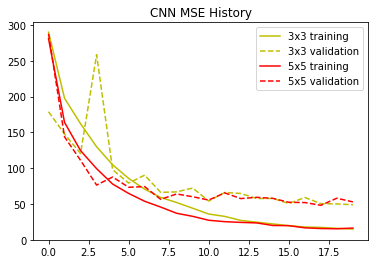

In [55]:
a = plt.plot(cnn3_history.history['loss'], 'y', label='3x3 training')
b = plt.plot(cnn3_history.history['val_loss'], 'y--', label='3x3 validation')
c = plt.plot(cnn5_history.history['loss'], 'r', label='5x5 training')
d = plt.plot(cnn5_history.history['val_loss'], 'r--', label='5x5 validation')
plt.legend()
plt.title("CNN MSE History")
ax = plt.gca()
ax.set_ylim(bottom=0)

(0.0, 308.046460723877)

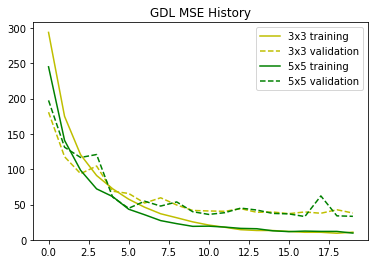

In [56]:
a = plt.plot(gdl3_history.history['loss'], 'y', label='3x3 training')
b = plt.plot(gdl3_history.history['val_loss'], 'y--', label='3x3 validation')
c = plt.plot(gdl5_history.history['loss'], 'g', label='5x5 training')
d = plt.plot(gdl5_history.history['val_loss'], 'g--', label='5x5 validation')
plt.legend()
plt.title("GDL MSE History")
ax = plt.gca()
ax.set_ylim(bottom=0)

(0.0, 308.046460723877)

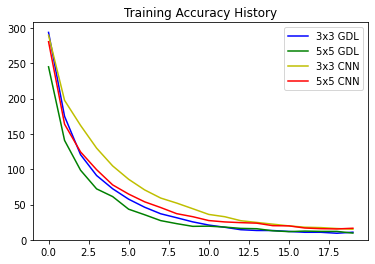

In [59]:
a = plt.plot(gdl3_history.history['loss'], 'b', label='3x3 GDL')
b = plt.plot(gdl5_history.history['loss'], 'g', label='5x5 GDL')
c = plt.plot(cnn3_history.history['loss'], 'y', label='3x3 CNN')
d = plt.plot(cnn5_history.history['loss'], 'r', label='5x5 CNN')
plt.legend()
plt.title("Training Accuracy History")
ax = plt.gca()
ax.set_ylim(bottom=0)

(0.0, 300.39069805145266)

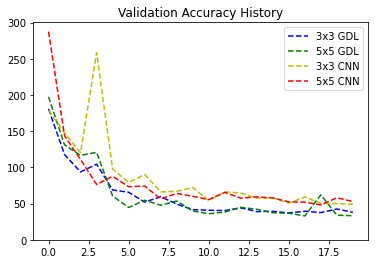

In [58]:
a = plt.plot(gdl3_history.history['val_loss'], 'b--', label='3x3 GDL')
b = plt.plot(gdl5_history.history['val_loss'], 'g--', label='5x5 GDL')
c = plt.plot(cnn3_history.history['val_loss'], 'y--', label='3x3 CNN')
d = plt.plot(cnn5_history.history['val_loss'], 'r--', label='5x5 CNN')
plt.title("Validation Accuracy History")
plt.legend()
ax = plt.gca()
ax.set_ylim(bottom=0)

In [49]:
gdl3_model.evaluate(input_test_norm, output_test)
gdl5_model.evaluate(input_test_norm, output_test)

209/209 [==============================] - 5s 22ms/step - loss: 25.2490


25.248958587646484

In [50]:
cnn3_model.evaluate(input_test_norm, output_test)
cnn5_model.evaluate(input_test_norm, output_test)

209/209 [==============================] - 1s 6ms/step - loss: 36.6028


36.60279846191406